In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
#import ipyplot

# Functions

In [2]:
def probs(n=0, nthresh=500):
    '''
    in this example, the probability of clicking each ad changes with time
    n is the counter/round for when the ad is being shown
    preferences change by a small amount epsilon
    '''
    #parameter
    eps = 0.1
    
    #baseline probabilities of clicking ads
    adprobs = [0.01, 0.015, 0.25, 0.18, 0.05]
    
    if (n> nthresh):
        adprobs = [0.01, 0.015, 0.1, 0.28, 0.05]
    
    return adprobs

print (probs(0))
probs(1000)

[0.01, 0.015, 0.25, 0.18, 0.05]


[0.01, 0.015, 0.1, 0.28, 0.05]

In [3]:
def computeucb(shown, clicked):
    '''
    function to compute upper confidence bound
    UCB calculation from: 
    https://analyticsindiamag.com/reinforcement-learning-the-concept-behind-ucb-explained-with-code/
    '''
    #no of ads shown
    nads = len(shown)
    
    #mean and sd of clicks
    mean = np.zeros(nads)
    sd = np.zeros(nads)
    
    #no of times ads are shown
    nrounds = np.sum(shown)
    
    for i in range(nads):
        mean[i] = round(clicked[i]/shown[i], 3)
        
        # formula for delta and upper confidence bound from 
        #https://analyticsindiamag.com/reinforcement-learning-the-concept-behind-ucb-explained-with-code/
        sd[i] = round (np.sqrt(1.5 * np.log(nrounds+1)/ shown[i]), 3)
        
    ucb = mean + sd
    
    return (ucb)

In [4]:
def dynamiclearning(nrounds):
    '''
    show ads and learn from changing click through rates
    '''
    #parameters
    
    #1. no of ads to be shown
    nads = 5 #if you change this, change the array size in probs function
    print ('no of ads for testing are {}'.format(nads))
    
    adsperday = 1000
    print ('no of ads shown per day are {}'.format(adsperday))
    
    #2. exploration threshold
    thresh = 0.2  #20% exploration and 80% exploitation
    print ('exploration happens for {}% of time'.format(thresh*100))
    #exploration 
    
    # part 1:
    # initialize arrays for counting
    shown = np.zeros(nads)
    print ('no of times each ad is shown is {}'.format(shown))
    clicked = np.zeros(nads)
    print ('no of times each ad is clicked is {}'.format(clicked))
    
    ucb = np.zeros(nads)
    print ('initial upper confidence bound array is {}'.format(ucb))
    
    # lists for prediction
    ucbl = []
    shownl = []
    clickedl = []
    actuall = []
    
    #loop over rounds / days
    for nr in range(nrounds):
        
        # loop over ads shown in a day
        for count in range(adsperday):
            #print (count)
            
            # part 2: choose exploration vs. exploitation
            # if exploration, choose random ad, else, choose best ad based on ucb
            if (np.random.random() < thresh):
                chosenad = np.random.randint(5)
            else:
                chosenad = np.argmax(ucb)
            
            #increment the ad shown count
            shown[chosenad] += 1
            
            #part 3:
            # for the ad chosen, get adprobs for nround and check if ad is clicked or not
            #update adshown, adclicked, ucb matrices
            adp = probs(nr)
            if (np.random.random() < adp[chosenad]):
                # ad is clicked
                clicked[chosenad] += 1
                #else, ad is not clicked
    
        # exiting inner lopp
        shownl.append(list(shown))
        clickedl.append(list(clicked))

        #part 4: compute ucb
        ucb = computeucb(shown, clicked)
        ucbl.append(list(ucb))
    
        act = probs(nr)
        actuall.append(act)        
        
    #cast them as dataframe for passing out of function
    showndf = pd.DataFrame(shownl)
    clickeddf = pd.DataFrame(clickedl)
    ucbdf = pd.DataFrame(ucbl)
    actualdf = pd.DataFrame(actuall)
    
    return (showndf, clickeddf, ucbdf, actualdf)

In [5]:
#ab, cd, ef, gh = dynamiclearning(5000)

In [6]:
ab1, cd1, ef1, gh1 = dynamiclearning(5000)

no of ads for testing are 5
no of ads shown per day are 1000
exploration happens for 20.0% of time
no of times each ad is shown is [0. 0. 0. 0. 0.]
no of times each ad is clicked is [0. 0. 0. 0. 0.]
initial upper confidence bound array is [0. 0. 0. 0. 0.]


In [7]:
def label(ab1, cd1, ef1, gh1):
    
    ab = ab1.copy()
    cd = cd1.copy()
    ef = ef1.copy()
    gh = gh1.copy()
    
    # Process shown ads
    ab.index.names = ['Day Count']
    ab.columns = ['Ad 1 shown', 'Ad 2 shown', 'Ad 3 shown', 'Ad 4 shown', 'Ad 5 shown']
    ab["Total Ads shown till that day"] = ab.sum(axis=1)
    
    #process clicked ads
    cd.index.names = ['Day Count']
    cd.columns = ['Ad 1 clicked', 'Ad 2 clicked', 'Ad 3 clicked', 'Ad 4 clicked', 'Ad 5 clicked']
    cd["Total Ads clicked till that day"] = cd.sum(axis=1)
    
    #process UCB estimate
    ef.index.names = ['Day Count']
    ef.columns = ['UCB est for Ad 1','UCB est for Ad 2','UCB est for Ad 3','UCB est for Ad 4','UCB est for Ad 5']
    
    gh.index.names = ['Day Count']
    gh.columns = ['Actual CTR Ad 1','Actual CTR Ad 2','Actual CTR Ad 3','Actual CTR Ad 4','Actual CTR Ad 5']
    
    
    return (ab, cd, ef, gh)

In [8]:
# small function to add labels to dataframes
ab, cd, ef, gh = label(ab1, cd1, ef1, gh1)

In [9]:
ab.head()


,Ad 1 shown,Ad 2 shown,Ad 3 shown,Ad 4 shown,Ad 5 shown,Total Ads shown till that day
Day Count,,,,,,
0,826.0,54.0,36.0,42.0,42.0,1000.0
1,859.0,87.0,890.0,81.0,83.0,2000.0
2,898.0,129.0,929.0,906.0,138.0,3000.0
3,936.0,166.0,1771.0,941.0,186.0,4000.0
4,984.0,211.0,2617.0,969.0,219.0,5000.0


In [10]:
cd.head()

,Ad 1 clicked,Ad 2 clicked,Ad 3 clicked,Ad 4 clicked,Ad 5 clicked,Total Ads clicked till that day
Day Count,,,,,,
0,10.0,0.0,10.0,10.0,2.0,32.0
1,10.0,0.0,234.0,18.0,7.0,269.0
2,11.0,2.0,251.0,176.0,10.0,450.0
3,12.0,4.0,456.0,185.0,13.0,670.0
4,12.0,4.0,656.0,191.0,14.0,877.0


In [11]:
ef.head()

,UCB est for Ad 1,UCB est for Ad 2,UCB est for Ad 3,UCB est for Ad 4,UCB est for Ad 5
Day Count,,,,,
0,0.124,0.438,0.815,0.735,0.545
1,0.127,0.362,0.376,0.597,0.455
2,0.128,0.321,0.384,0.309,0.367
3,0.128,0.298,0.341,0.312,0.329
4,0.126,0.265,0.321,0.312,0.306


In [12]:
gh.head()

,Actual CTR Ad 1,Actual CTR Ad 2,Actual CTR Ad 3,Actual CTR Ad 4,Actual CTR Ad 5
Day Count,,,,,
0,0.01,0.015,0.25,0.18,0.05
1,0.01,0.015,0.25,0.18,0.05
2,0.01,0.015,0.25,0.18,0.05
3,0.01,0.015,0.25,0.18,0.05
4,0.01,0.015,0.25,0.18,0.05


# Testing the outcomes

Data has been prepred in such a way that Ad 4 CTR increases and Ad 3 CTR decreases after a fixed date.
The intention is to check if Multi Armed Bandit RL model is able to capture that behaviour or not.

Text(0, 0.5, 'Overall CTR')

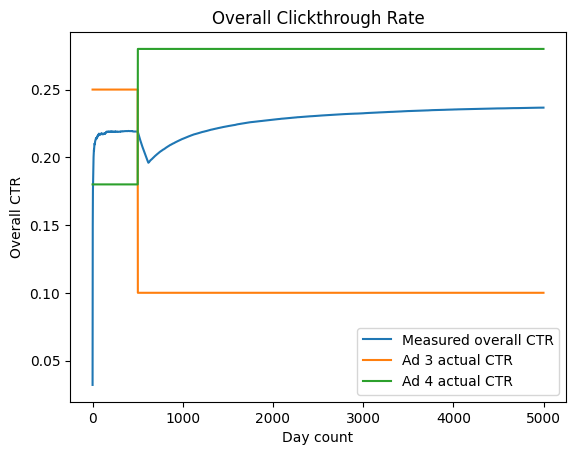

In [13]:
#overall click through rate
plt.title('Overall Clickthrough Rate')
plt.plot(cd['Total Ads clicked till that day']/ab['Total Ads shown till that day'])
plt.plot(gh['Actual CTR Ad 3'])
plt.plot(gh['Actual CTR Ad 4'])
plt.legend(['Measured overall CTR', 'Ad 3 actual CTR', 'Ad 4 actual CTR'])
plt.xlabel('Day count')
plt.ylabel('Overall CTR')

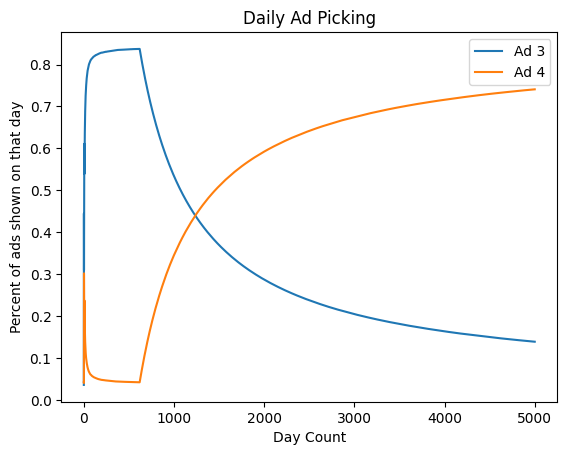

In [14]:
# no of times most popular ad is picked up
plt.plot(ab['Ad 3 shown']/ab['Total Ads shown till that day'])
plt.plot(ab['Ad 4 shown']/ab['Total Ads shown till that day'])
plt.xlabel('Day Count')
plt.ylabel('Percent of ads shown on that day')
plt.title('Daily Ad Picking')
plt.legend(['Ad 3', 'Ad 4'])

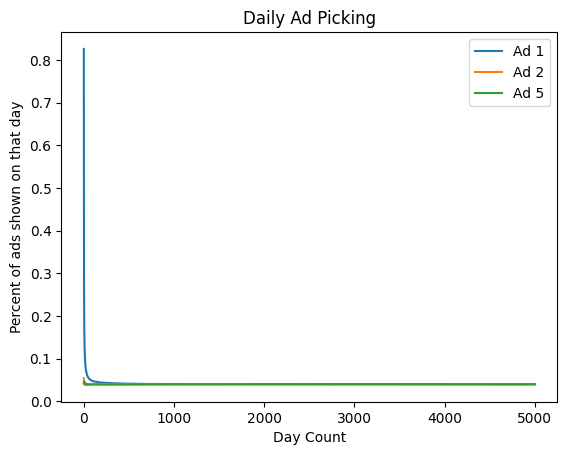

In [15]:
# no of times other ads are picked up
plt.plot(ab['Ad 1 shown']/ab['Total Ads shown till that day'])
plt.plot(ab['Ad 2 shown']/ab['Total Ads shown till that day'])
plt.plot(ab['Ad 5 shown']/ab['Total Ads shown till that day'])
plt.xlabel('Day Count')
plt.ylabel('Percent of ads shown on that day')
plt.title('Daily Ad Picking')
plt.legend(['Ad 1', 'Ad 2', 'Ad 5'])

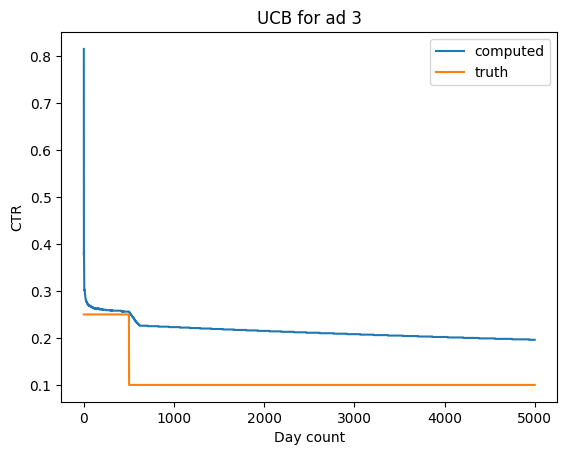

In [16]:
plt.title('UCB for ad 3')
plt.plot(ef['UCB est for Ad 3'])
plt.plot(gh['Actual CTR Ad 3'])
plt.xlabel('Day count')
plt.ylabel('CTR')
plt.legend(['computed', 'truth'])

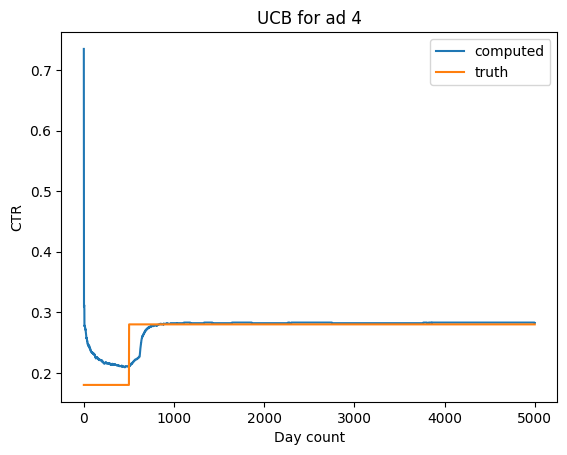

In [17]:
plt.title('UCB for ad 4')
plt.plot(ef['UCB est for Ad 4'])
plt.plot(gh['Actual CTR Ad 4'])
plt.xlabel('Day count')
plt.ylabel('CTR')
plt.legend(['computed', 'truth'])

In [18]:
ab.head()

,Ad 1 shown,Ad 2 shown,Ad 3 shown,Ad 4 shown,Ad 5 shown,Total Ads shown till that day
Day Count,,,,,,
0,826.0,54.0,36.0,42.0,42.0,1000.0
1,859.0,87.0,890.0,81.0,83.0,2000.0
2,898.0,129.0,929.0,906.0,138.0,3000.0
3,936.0,166.0,1771.0,941.0,186.0,4000.0
4,984.0,211.0,2617.0,969.0,219.0,5000.0


In [19]:
ab['Ad3diff'] = ab['Ad 3 shown'].diff()
ab['Ad4diff'] = ab['Ad 4 shown'].diff()
ab['TotalDiff'] = ab['Total Ads shown till that day'].diff()

In [20]:
ab.head()

,Ad 1 shown,Ad 2 shown,Ad 3 shown,Ad 4 shown,Ad 5 shown,Total Ads shown till that day,Ad3diff,Ad4diff,TotalDiff
Day Count,,,,,,,,,
0,826.0,54.0,36.0,42.0,42.0,1000.0,NaN,NaN,NaN
1,859.0,87.0,890.0,81.0,83.0,2000.0,854.0,39.0,1000.0
2,898.0,129.0,929.0,906.0,138.0,3000.0,39.0,825.0,1000.0
3,936.0,166.0,1771.0,941.0,186.0,4000.0,842.0,35.0,1000.0
4,984.0,211.0,2617.0,969.0,219.0,5000.0,846.0,28.0,1000.0


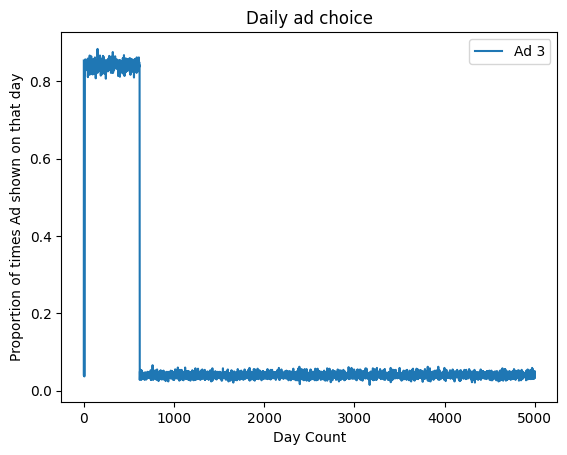

In [21]:
plt.plot(ab['Ad3diff']/ab['TotalDiff'])
plt.xlabel('Day Count')
plt.ylabel('Proportion of times Ad shown on that day')
plt.title('Daily ad choice')
plt.legend(['Ad 3'])

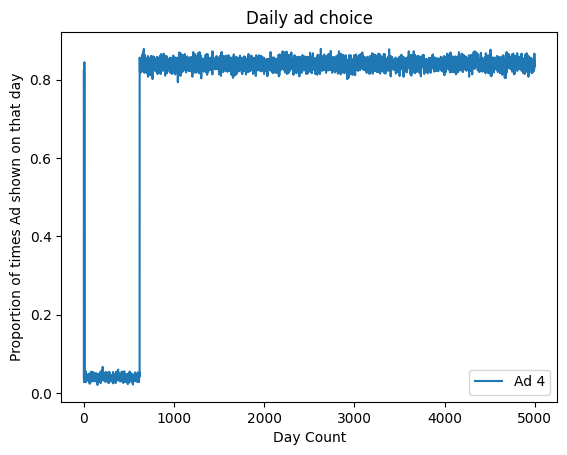

In [22]:
plt.plot(ab['Ad4diff']/ab['TotalDiff'])
plt.xlabel('Day Count')
plt.ylabel('Proportion of times Ad shown on that day')
plt.title('Daily ad choice')
plt.legend(['Ad 4'])